In [1]:
import pandas_datareader as pdr
import numpy as np
import pandas as pd
import scipy.optimize 
from datetime import datetime,time,timedelta
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

from Strategy.strategy1 import strategy1
from Strategy.strategy2 import strategy2
from Strategy.strategy3 import strategy3

In [2]:
factors = pd.read_csv("./Factors/merge_Factors.csv")
factor_returns = pd.read_csv("./Predict/factors_returns_pred.csv")

In [3]:
portfolio_val_1_8 = pd.read_csv("./portfolio_val_1_8.csv")
portfolio_val_1_9 = pd.read_csv("./portfolio_val_1_9.csv")
portfolio_val_1_10 = pd.read_csv("./portfolio_val_1_10.csv")
portfolio_val_2_8 = pd.read_csv("./portfolio_val_2_8.csv")
portfolio_val_2_9 = pd.read_csv("./portfolio_val_2_9.csv")
portfolio_val_2_10 = pd.read_csv("./portfolio_val_2_10.csv")
portfolio_val_3_8 = pd.read_csv("./portfolio_val_3_8.csv")
portfolio_val_3_9 = pd.read_csv("./portfolio_val_3_9.csv")
portfolio_val_3_10 = pd.read_csv("./portfolio_val_3_10.csv")

In [4]:
daily_return_1_89 = np.concatenate((portfolio_val_1_8['Total'].values, portfolio_val_1_9['Total'].values), axis=0)

In [5]:
daily_return_2_89 = np.concatenate((portfolio_val_2_8['Total'].values, portfolio_val_2_9['Total'].values), axis=0)

In [6]:
daily_return_3_89 = np.concatenate((portfolio_val_3_8['Total'].values, portfolio_val_3_9['Total'].values), axis=0)

In [7]:
portfolio_89 = factors.loc[(factors["Date"]>='2022-08-01') & (factors["Date"]<='2022-09-30') & (factors["Index"]=='ASML')]
portfolio_89 = portfolio_89[['Date']].reset_index(drop=True)
portfolio_89['strategy1'] = daily_return_1_89
portfolio_89['strategy2'] = daily_return_2_89
portfolio_89['strategy3'] = daily_return_3_89
portfolio_89 = portfolio_89.set_index("Date")
portfolio_89

,strategy1,strategy2,strategy3
Date,,,
2022-08-01,-0.012953,0.275727,0.068766
2022-08-02,0.013288,-0.071477,-0.000828
2022-08-03,-0.023671,-0.061400,0.029992
2022-08-04,-0.236179,0.007639,0.017287
2022-08-05,0.054861,-0.013754,-0.027202
2022-08-08,-0.032079,0.000661,-0.017025
2022-08-09,-0.111080,-0.044803,0.004394
2022-08-10,0.001981,0.076733,0.060236
2022-08-11,-0.031339,-0.045919,-0.017476


In [8]:
portfolio_89['strategy1'].mean() / portfolio_89['strategy1'].std()

-0.08936700396113886

In [9]:
portfolio_89['strategy2'].mean() / portfolio_89['strategy2'].std()

0.0090104652490303

In [10]:
portfolio_89['strategy3'].mean() / portfolio_89['strategy3'].std()

-0.014469776730525422

<AxesSubplot: xlabel='Date'>

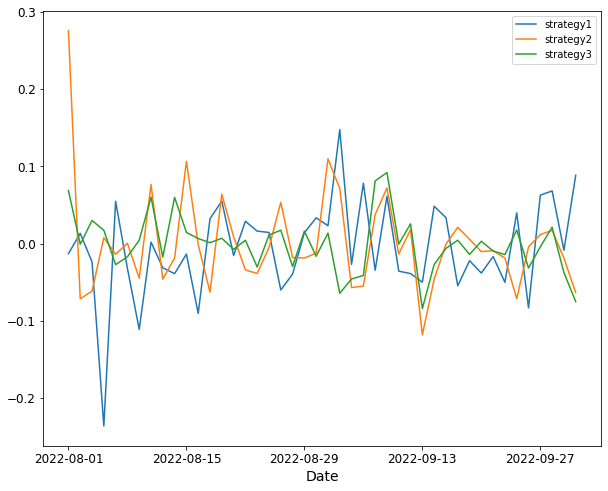

In [11]:
portfolio_89.plot(figsize=(10,8))

In [12]:
portfolio_10 = factors.loc[(factors["Date"]>='2022-10-01') & (factors["Date"]<='2022-10-31') & (factors["Index"]=='ASML')]
portfolio_10 = portfolio_10[['Date']].reset_index(drop=True)
portfolio_10['strategy1'] = portfolio_val_1_10['Total']
portfolio_10['strategy2'] = portfolio_val_2_10['Total']
portfolio_10['strategy3'] = portfolio_val_3_10['Total']
portfolio_10 = portfolio_10.set_index("Date")
portfolio_10

,strategy1,strategy2,strategy3
Date,,,
2022-10-03,-0.057574,0.033746,0.004904
2022-10-04,0.133755,0.006169,-0.012102
2022-10-05,0.050617,-0.011731,-0.001507
2022-10-06,0.053473,-0.010551,-0.000209
2022-10-07,0.049525,-0.025258,0.008493
2022-10-10,0.073464,0.003738,-0.107871
2022-10-11,0.047757,-0.017663,0.038939
2022-10-12,0.132725,-0.007272,-0.011377
2022-10-13,0.003878,0.009397,-0.054904


In [13]:
portfolio_10['strategy1'].mean() / portfolio_10['strategy1'].std()

0.465357705233142

In [14]:
portfolio_10['strategy2'].mean() / portfolio_10['strategy2'].std()

0.011172877699074735

In [15]:
portfolio_10['strategy3'].mean() / portfolio_10['strategy3'].std()

-0.21473298151337816

<AxesSubplot: xlabel='Date'>

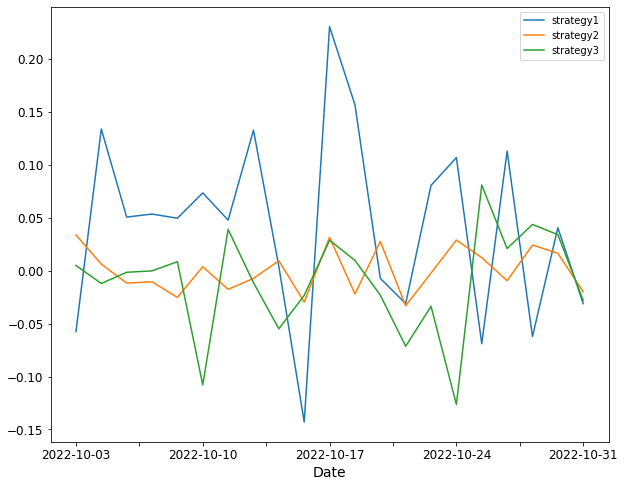

In [16]:
portfolio_10.plot(figsize=(10,8))